32


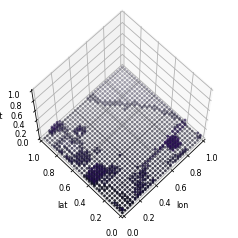

In [40]:
import argparse
import numpy
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
import matplotlib.cm as cm

##
##  script - argument and parameter
##
'''
# create argument parser #
ml_apar = argparse.ArgumentParser()

# argument directive #
ml_apar.add_argument( '-r', '--raster', type=str, help='raster path' )
ml_apar.add_argument( '-p', '--plot'  , type=str, help='plot path'   )

# read argument and parameter #
ml_args = ml_apar.parse_args()
'''

ml_args_raster = './raster/raster-000027.ras'
ml_args_plot = './raster'

##
##  script - raster importation
##

def ml_raster_import( ml_path ):

    # check consistency #
    if ( not os.path.exists( ml_path ) ):

        # send message #
        sys.exit( 'turing : error : unable to access raster' )

    # retrieve raster size #
    ml_size = os.path.getsize( ml_path )

    # compute raster width #
    ml_width = int( round( ml_size ** ( 1.0 / 3.0 ) ) )
    print(ml_width)

    # import raster data #
    with open( ml_path, 'rb' ) as ml_file:

        # read raster bytes #
        ml_byte = ml_file.read( ml_size )

    # convert to numpy array #
    ml_data = numpy.frombuffer( ml_byte, dtype=numpy.uint8 )

    # return raster array #
    return ml_data.reshape( ml_width, ml_width, ml_width )

##
##  script - raster convertion
##

def ml_raster_convert( ml_raster ):

    # check consistency #
    if ( ( ml_raster.shape[0] != ml_raster.shape[1] ) or ( ml_raster.shape[0] != ml_raster.shape[2] ) ):

        # send message #
        sys.exit( 'turing : error : raster not consistent' )

    # retrieve raster width #
    ml_width = ml_raster.shape[0]

    # initialise array #
    ml_data = numpy.empty( ( 0, 3 ), dtype=numpy.uint8 )

    # parsing raster array #
    for ml_x in range( ml_width ):

        # parsing raster array #
        for ml_y in range( ml_width ):

            # parsing raster array #
            for ml_z in range( ml_width ):

                # check raster element #
                if ( ml_raster[ml_x, ml_y, ml_z] != 0 ):

                    # compute element coordinates #
                    ml_r = ml_x / ml_width
                    ml_s = ml_y / ml_width
                    ml_t = ml_z / ml_width

                    # append element #
                    ml_data = numpy.append( ml_data, numpy.array( [[ ml_r, ml_s, ml_t ]] ), axis=0 )

    # return converted array #
    return( ml_data )

##
##  script - main function
##

# import raster array #
ml_data = ml_raster_import( ml_args_raster )

# convert raster to point set #
ml_data = ml_raster_convert( ml_data )

# create figure #
ml_figure = plt.figure()

# create figure sub-plot #
ml_plot = ml_figure.add_subplot( 111, projection='3d' )

# create scatter plot : s=8 for w=64, s=24 for w=32 #
ml_plot.scatter(ml_data[:,2], ml_data[:,1], ml_data[:,0], c=ml_data[:,0], s=8, marker='o', edgecolor='none', cmap='inferno', vmin=0.0, vmax=1.25 )

# setting axis labels #
ml_plot.set_xlabel( 'lon' )
ml_plot.set_ylabel( 'lat' )
ml_plot.set_zlabel( 'alt' )

# setting axis aspect ratio #
ml_plot.set_aspect( 'equal' )

# setting axis limits #
ml_plot.set_xlim( 0.0, 1.0 )
ml_plot.set_ylim( 0.0, 1.0 )
ml_plot.set_zlim( 0.0, 1.0 )

# setting plot initial camera view #
ml_plot.view_init( elev=66, azim=225 )

# update plot font size #
mpl.rcParams.update( { 'font.size': 8 } )

# check display switch #
if ( ml_args_plot is not None ):

    # export figure #
    plt.savefig( ml_args_plot, bbox_inches='tight' )

else:

    # display figure #
    plt.show()

# destroy figure #
#plt.close( ml_figure )